In [ ]:
# 📦 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Display settings
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

In [ ]:

# 📂 2. Load Dataset
df = pd.read_csv("../dataset/Healthcare-Diabetes.csv")

print(" Dataset Loaded Successfully!")
print("Shape of dataset:", df.shape)

✅ Dataset Loaded Successfully!
Shape of dataset: (2768, 10)


In [ ]:
# 🧭 3. Basic Overview
print("\n🔹 First 5 Rows:")
display(df.head())


🔹 First 5 Rows:


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print("\n🔹 Data Info:")
display(df.info())


🔹 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


None

In [ ]:
print("\n🔹 Summary Statistics:")
display(df.describe())


🔹 Summary Statistics:


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [ ]:
#  4. Check for Missing or Invalid Values
print("\n🔹 Missing Values per Column:")
print(df.isnull().sum())


🔹 Missing Values per Column:
Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Sometimes zeros are invalid (like BMI, Glucose, etc.), replace them with NaN
cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zero_invalid:
    df[col] = df[col].replace(0, np.nan)

In [ ]:
print("\nAfter replacing zeros with NaN:")
print(df.isna().sum())


After replacing zeros with NaN:
Id                             0
Pregnancies                    0
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64


In [ ]:
# Impute missing values with median
for col in cols_with_zero_invalid:
    df[col] = df[col].fillna(df[col].median())


print("\n Missing values handled successfully!")


✅ Missing values handled successfully!


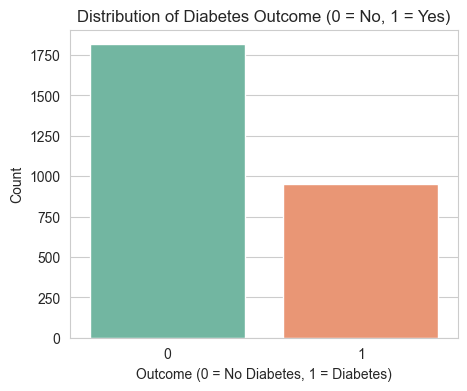

In [ ]:
#  5. Distribution of Target Variable
plt.figure(figsize=(5,4))
sns.countplot(x='Outcome', hue='Outcome', data=df, palette='Set2', legend=False)
plt.title("Distribution of Diabetes Outcome (0 = No, 1 = Yes)")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.show()


#Shows how many people are diabetic (1) vs non-diabetic (0).
#OBSERVATION 
"""Usually more non-diabetic people (Outcome=0).
This means class imbalance, which you may handle later using SMOTE or class weights."""

In [ ]:

print("Percentage of Diabetic Cases:")
print(df['Outcome'].value_counts(normalize=True) * 100)


Percentage of Diabetic Cases:
Outcome
0    65.606936
1    34.393064
Name: proportion, dtype: float64


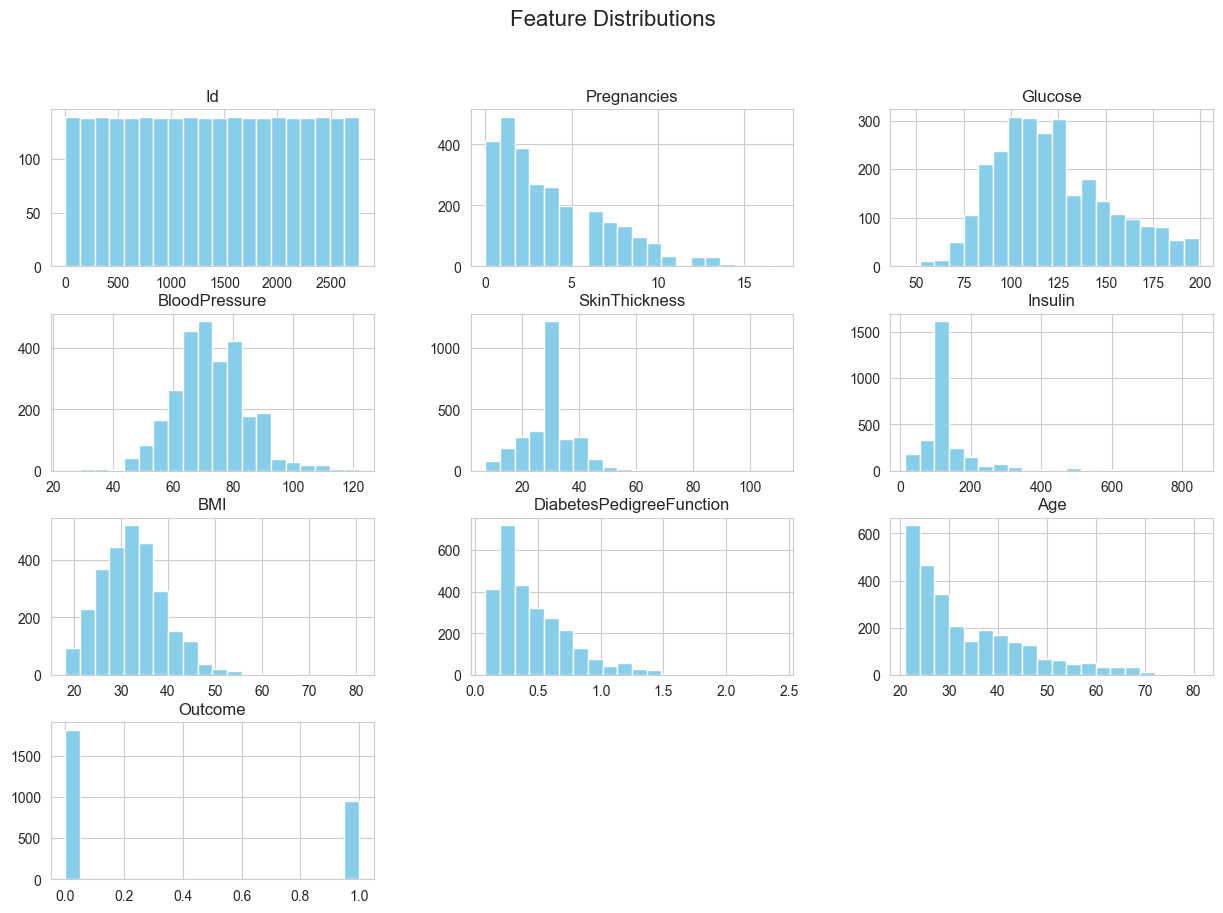

In [ ]:
#  6. Univariate Analysis (Histograms)
df.hist(bins=20, figsize=(15,10), color='skyblue')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


#Meaning:Shows distribution shape (normal, skewed, etc.) for every numeric column.
#Observations:

"""Age may be right-skewed (more young people).

Insulin often very skewed → can consider log transformation before training"""

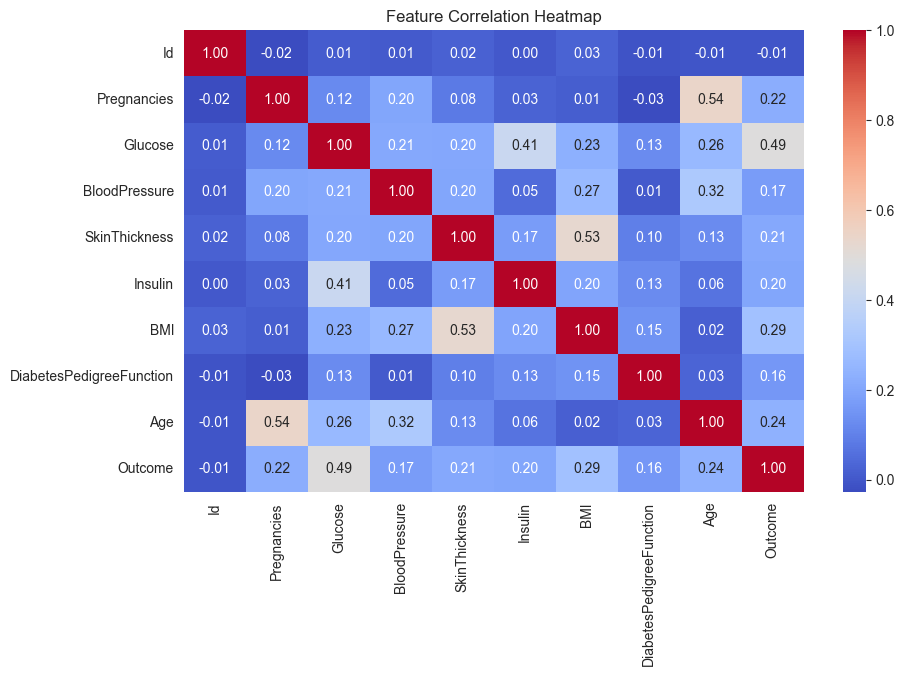

In [ ]:
#  7. Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


#Shows how strongly each feature is related to others (and to Outcome).
#Observations:

"""Glucose shows the strongest positive correlation with Outcome → very important for prediction.

Age and BMI also moderately correlated.

Other variables like BloodPressure and SkinThickness have weaker correlations."""

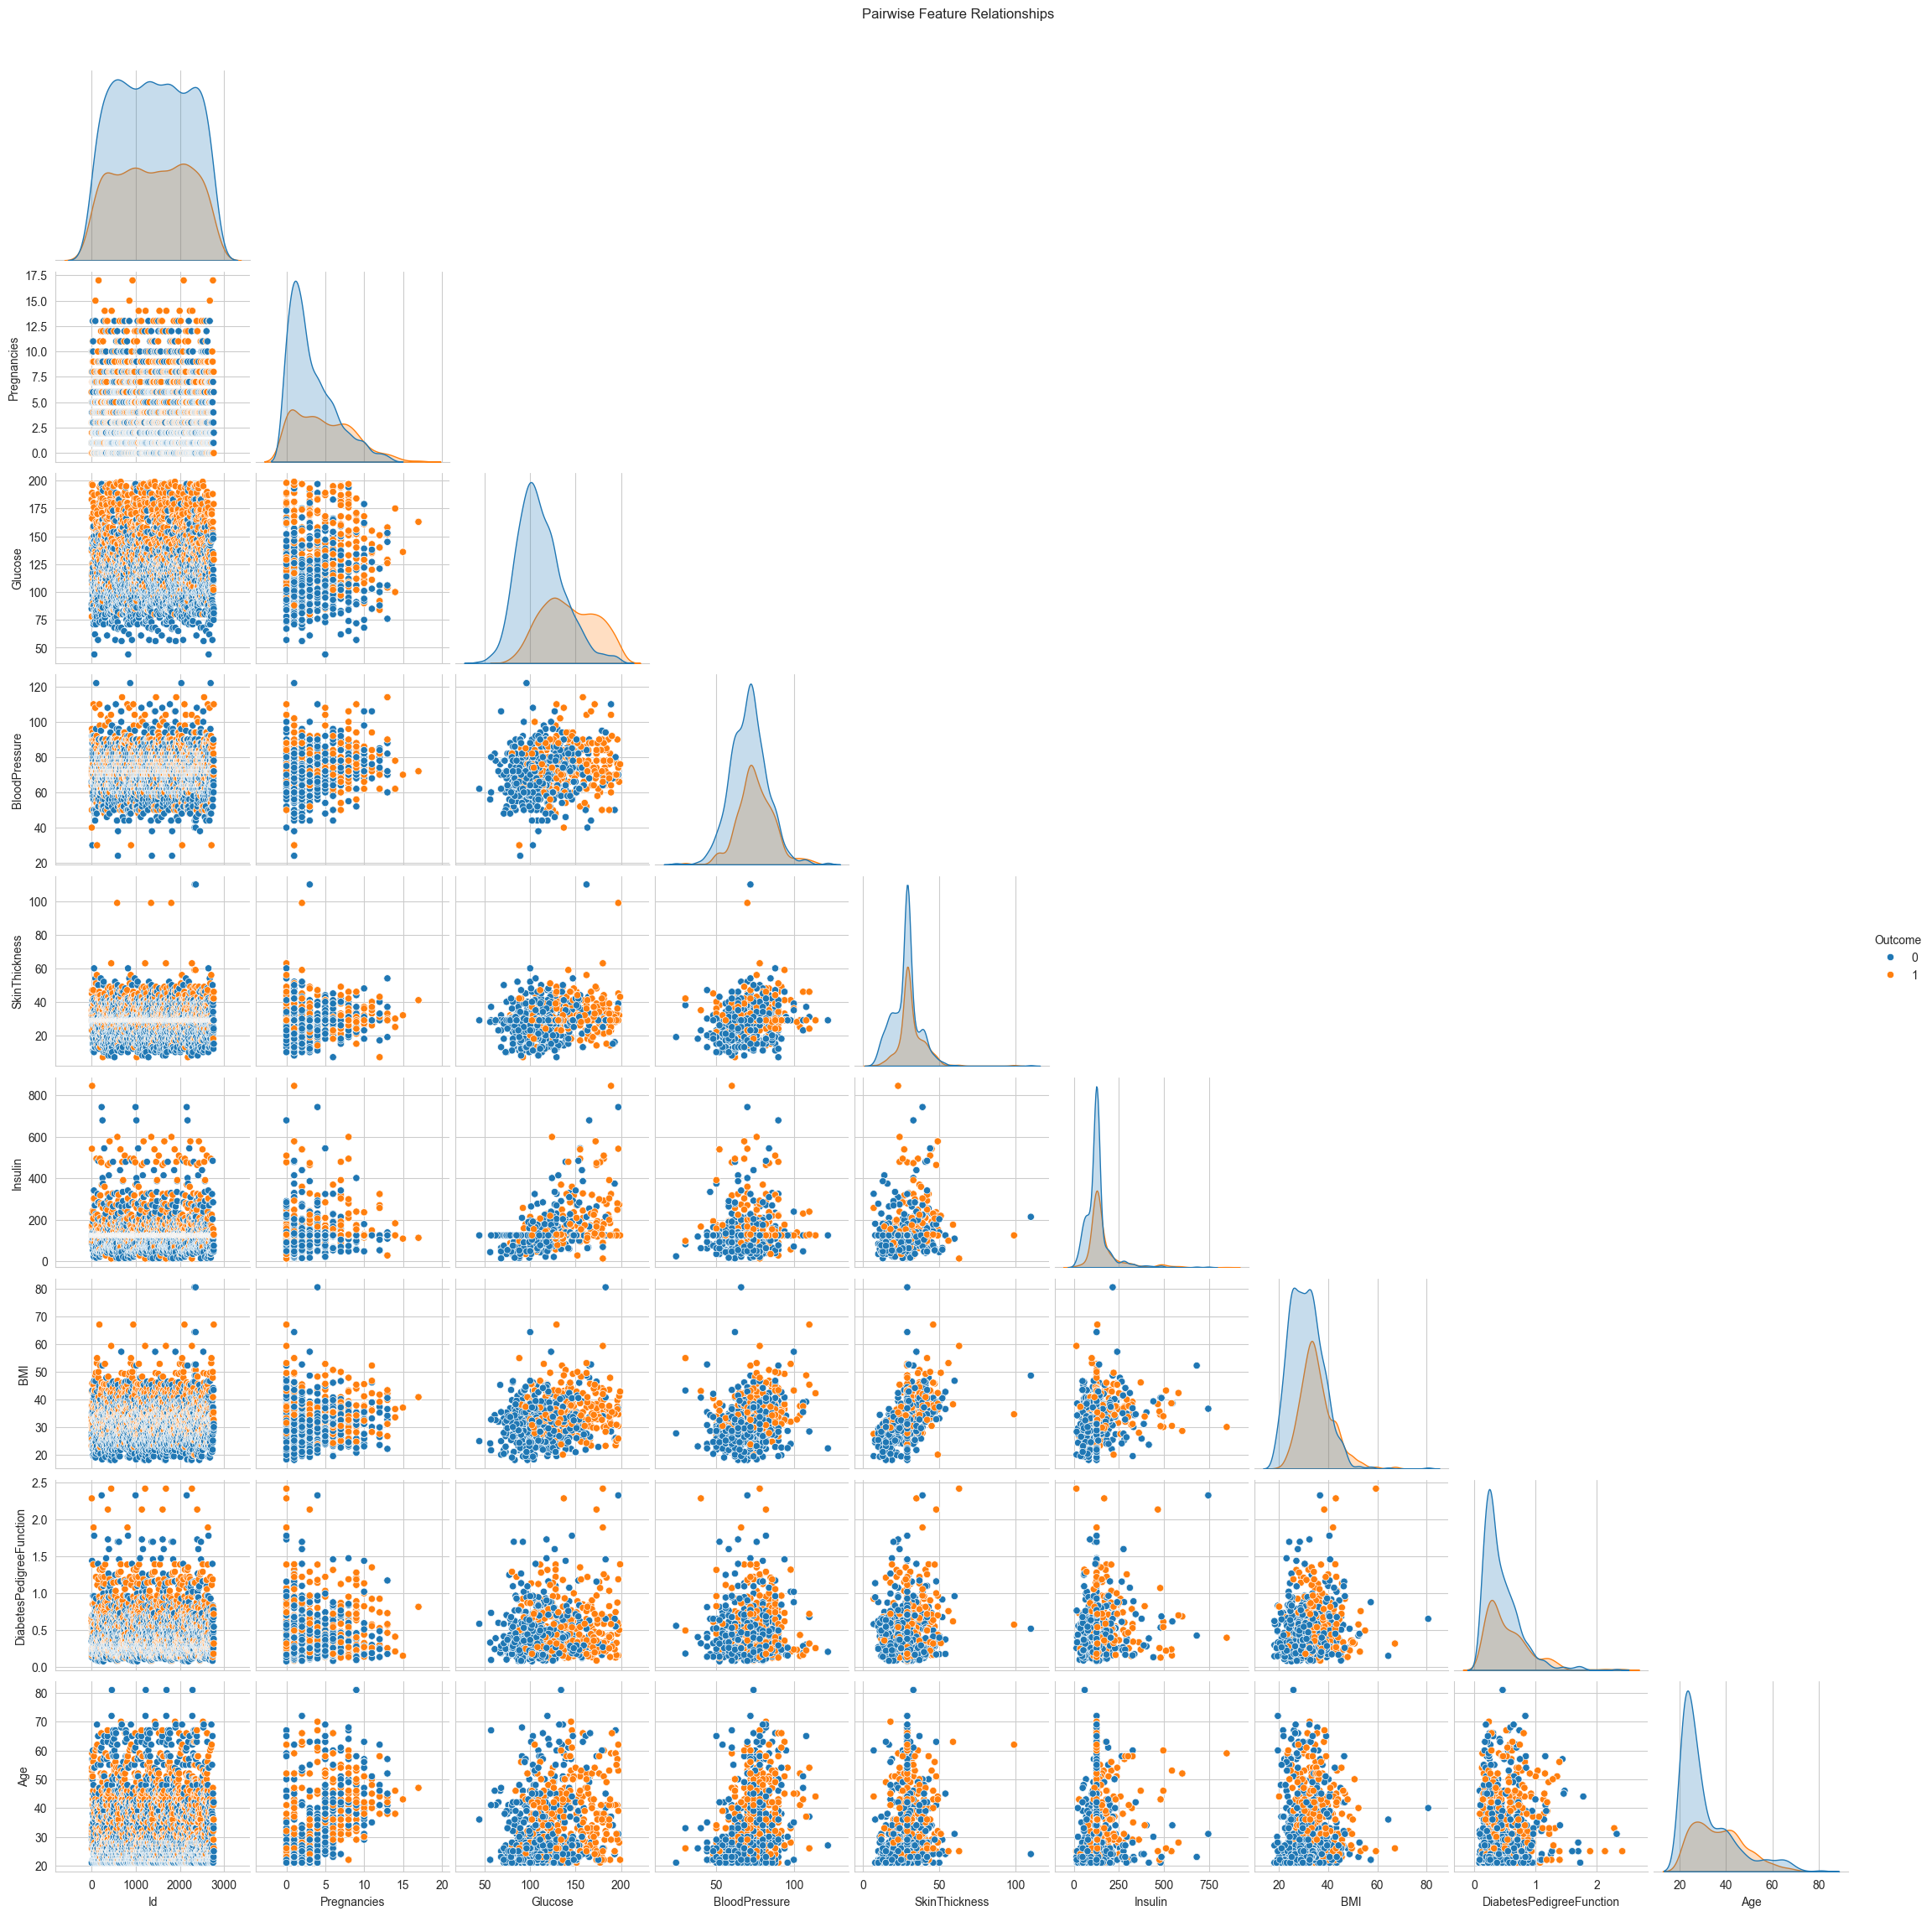

In [ ]:
#  8. Pairplot for Relationship Between Features
sns.pairplot(df, hue='Outcome', diag_kind='kde', corner=True)
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


#This shows relationships between all numerical features pairwise, colored by Outcome 
# (0 = Non-diabetic, 1 = Diabetic).
#OBSERVATION
"""People with higher glucose levels tend to have Outcome = 1.
BMI also tends to be higher for diabetics.
Some features overlap, showing complexity — perfect for ML."""

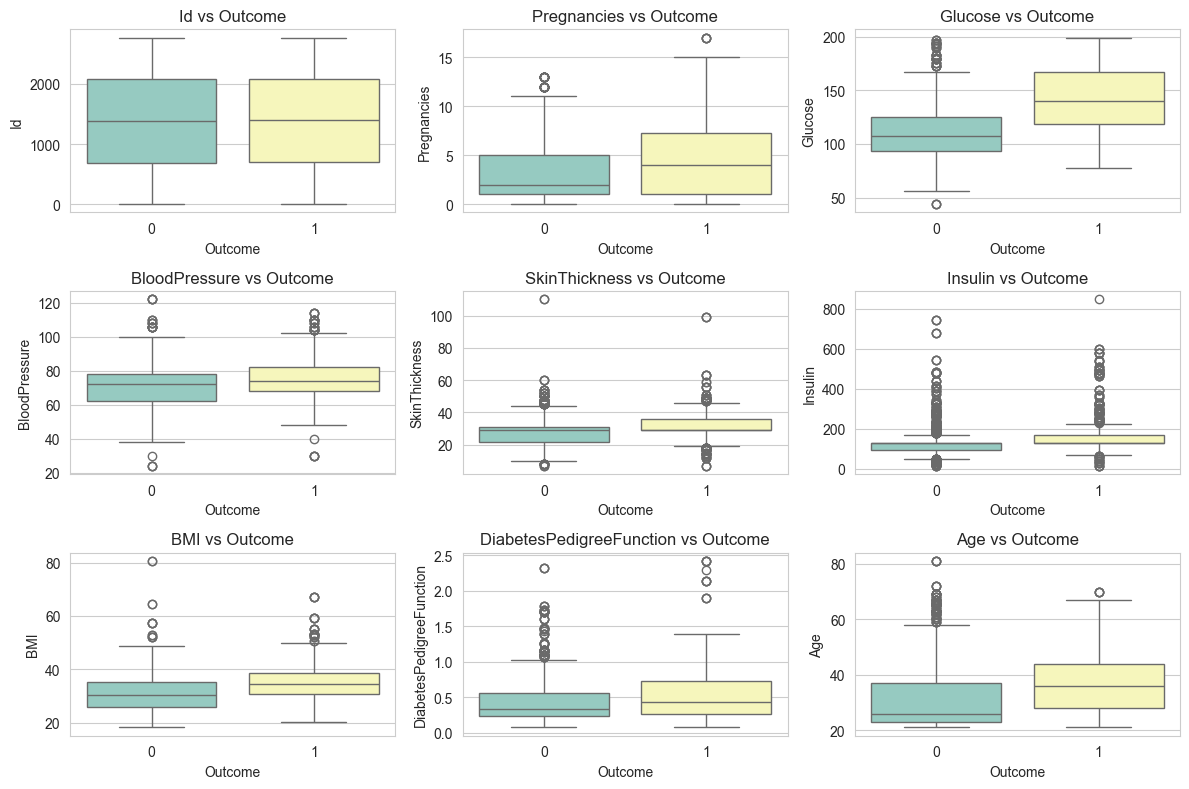

In [ ]:
# 9. Boxplots to Detect Outliers
plt.figure(figsize=(12,8))

for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(
        x='Outcome',
        y=col,
        hue='Outcome',          # Added hue
        data=df,
        palette='Set3',
        legend=False             #  Hide redundant legend
    )
    plt.title(f'{col} vs Outcome')

plt.tight_layout()
plt.show()

#Compares feature distributions for diabetic vs non-diabetic.
#OBSERVATION
"""Glucose is significantly higher in diabetics.

BMI and Age also generally higher.

You can add more boxplots for each key feature."""


In [ ]:
# 💡 10. Insights Summary
print("\n🔹 Key Insights:")
print("""
1. Glucose and BMI are highly correlated with Diabetes Outcome.
2. Some columns (like Insulin, SkinThickness) had many zeros, which were handled by median imputation.
3. Age and Pregnancies also show upward trend with diabetes.
4. Data is slightly imbalanced (more non-diabetic cases).
""")


🔹 Key Insights:

1. Glucose and BMI are highly correlated with Diabetes Outcome.
2. Some columns (like Insulin, SkinThickness) had many zeros, which were handled by median imputation.
3. Age and Pregnancies also show upward trend with diabetes.
4. Data is slightly imbalanced (more non-diabetic cases).



In [ ]:
# 💾 11. Save Cleaned Data for Model Training
df.to_csv("../dataset/cleaned_diabetes.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_diabetes.csv'")

print("\nEDA Completed Successfully! Ready for Model Training.")


✅ Cleaned dataset saved as 'cleaned_diabetes.csv'

🎉 EDA Completed Successfully! Ready for Model Training.
